# Credit Card Default Prediction

## Overview
This script aims to predict credit card defaults using various machine learning models.

## Steps

### 1. Import Libraries
- Import required libraries such as pandas, numpy, seaborn, matplotlib, and scikit-learn modules.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score

### 2. Load Dataset
- Load the dataset using pandas.

In [2]:
# Load the dataset
data = pd.read_csv("default_dataset.csv")
print(data.head())

     ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
0  8920      50000    1          1         2   23      2      3      2      0  \
1  8926      20000    1          3         1   51      0      0      0      0   
2  8930      10000    1          2         2   29      2      2      2      2   
3  8933     240000    2          2         2   42      1      2      2      0   
4  8938     170000    2          1         2   30      2      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
0  ...       8687       9048       9306         0      1000       810  \
1  ...      18905      19462      18967      1266      1270      2800   
2  ...       9089       8658       8372      2600       600       895   
3  ...     166813     170739     174532      6700         0      6900   
4  ...      30183      31041      31871      2000      2000      1233   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       500       408       500

### 3. Exploratory Data Analysis 
- EDA to understand the data

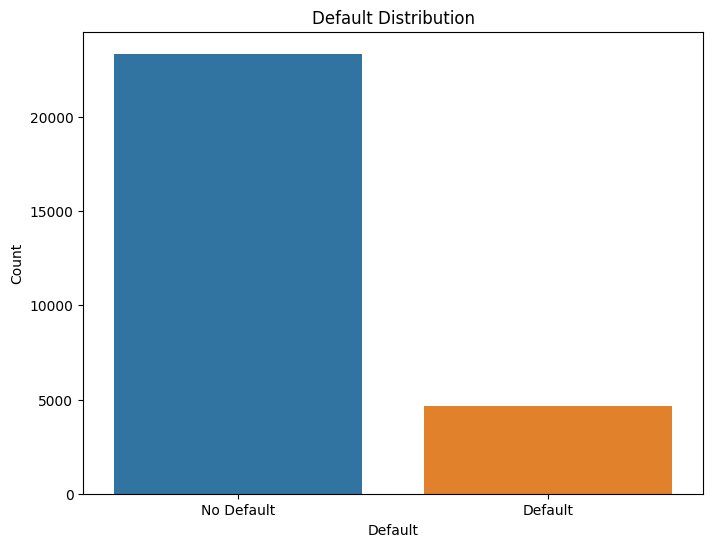

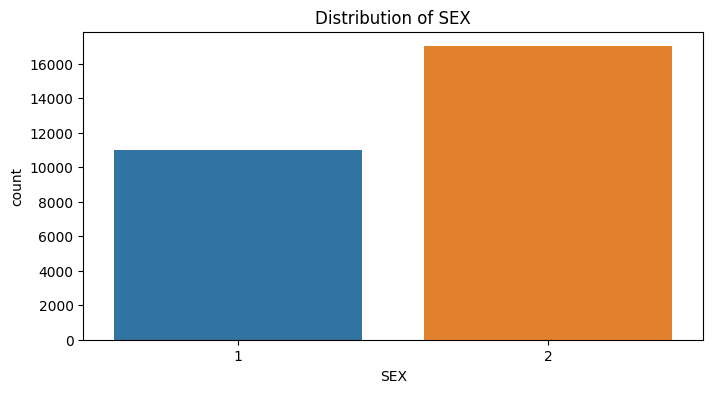

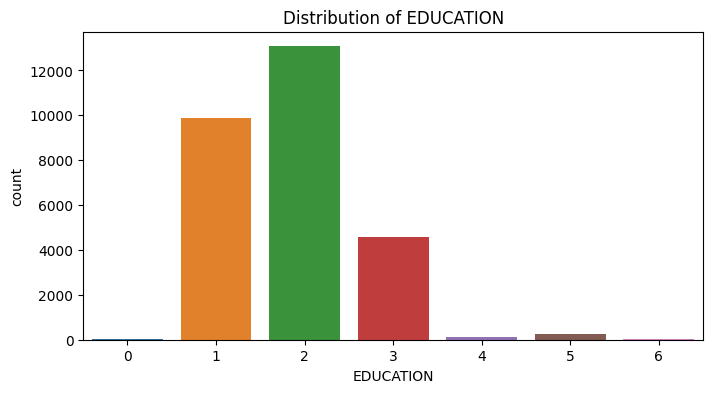

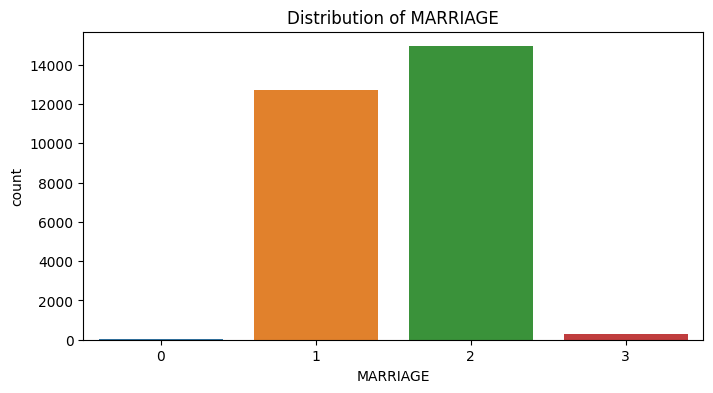

Missing values:
 ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64
Number of duplicate records: 0


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,...,27999.000000,27999.000000,27999.000000,27999.000000,2.799900e+04,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000
mean,15749.304368,169647.833137,1.607522,1.853888,1.552484,35.484696,-0.063324,-0.169327,-0.201900,-0.248009,...,43501.129397,40427.848780,38988.426658,5823.589878,6.107637e+03,5383.826137,4951.663381,4878.592700,5342.790350,0.165613
std,8452.091410,130240.416104,0.488311,0.795310,0.521850,9.168462,1.088628,1.162094,1.158822,1.139461,...,64547.035637,60932.675754,59691.059489,16926.065931,2.362333e+04,17997.627313,16023.404493,15329.242967,17990.023991,0.371740
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8999.500000,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2373.000000,1809.000000,1278.000000,1000.000000,1.000000e+03,457.000000,316.000000,298.500000,188.000000,0.000000
50%,15999.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19097.000000,18106.000000,17021.000000,2184.000000,2.078000e+03,1917.000000,1520.000000,1548.000000,1500.000000,0.000000
75%,22998.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,55154.500000,50437.500000,49380.000000,5100.000000,5.000000e+03,4730.000000,4162.000000,4181.500000,4133.500000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [3]:
# Define the target variable 'y'
y = data['default']

#Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Default Distribution")
plt.xlabel("Default")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

# Define the categorical variables
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']

# Create distribution plots for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.show()

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicate records:", duplicates)

# General Statistics on dataset
data.describe()

#### *Findings*
* Class imbalance on the Target Variable
* Inconsistency on data of categorical variables EDUCATION and MARRIGE.
*  PAY_0 column name inconsistent with other columns that start with 1 instead of 0.
*  No duplicates nor missing values on the dataset.

### 4. Preprocessing 
- Perform data preprocessing by replacing specific values in the EDUCATION and MARRIAGE columns.
- Drop the ID column.
- Convert categorical variables to dummy variables.
- Rename column PAY_0 for consistency.

In [4]:
# Preprocessing
data['EDUCATION'] = data['EDUCATION'].replace({5: 4, 6: 4, 0: 4})
data['MARRIAGE'] = data['MARRIAGE'].replace({0: 3})

# Remove ID column
data = data.drop("ID", axis=1)

# Dummies for Categorical Variables
data = pd.get_dummies(data, columns=["SEX", "EDUCATION", "MARRIAGE"], drop_first=True)

#Rename Column for consistency
data.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
print(data.head())

   LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1   
0      50000   23      2      3      2      0      0      0       7557  \
1      20000   51      0      0      0      0      2      2      14341   
2      10000   29      2      2      2      2      3      2       5833   
3     240000   42      1      2      2      0      0      0     187558   
4     170000   30      2      0      0      0      0      0      27267   

   BILL_AMT2  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  SEX_2  EDUCATION_2   
0       7293  ...       500       408       500        1  False        False  \
1      15371  ...      1000         0       512        1  False        False   
2       8162  ...         0         0       764        1  False         True   
3     187333  ...      6000      6000      6000        1   True         True   
4      28523  ...      1500      1500      2000        1   True        False   

   EDUCATION_3  EDUCATION_4  MARRIAGE_2  MARRIAGE_3  
0        False      


### 4. Define Features and Target Variables
- Define the features (X) and target variable (y) for model training.

In [5]:
# Define the features and target variable
X = data.drop('default', axis=1)
y = data['default']

### 5. Split Data
- Split the data into training and testing sets.

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 6. Feature Scaling
Helps prevent features with larger values from dominating those with smaller values during model training. This ensures that each feature contributes equally to the model's performance
- Scale the features using StandardScaler.

In [7]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 7. Apply SMOTE
Handle class imbalance in a dataset, the classes are not evenly distributed, and the minority class has fewer samples. Use to improved model performance, especially in terms of recall.
- Apply SMOTE to balance the dataset.

In [8]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### 8. Cross-validation Strategy
Evaluate the performance of a machine learning model.  It involves partitioning the dataset into k subsets, training the model on k-1 subsets, and validating the model on the remaining subset. Cross-validation helps to reduce overfitting and provides a better estimate of the model's performance on unseen data.
- Define a cross-validation strategy using StratifiedKFold.

In [9]:
# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 9. Define Models and Hyperparameter Grids
- Define logistic regression, decision tree, KNN, and random forest models.
    - Logistic regression: Simple and interpretable model suitable for binary classification problems and computationally efficient
    - Decision trees: Interpretable models that can capture complex, non-linear relationships between features and the target variable.
    - KNN: A non-parametric, lazy learning algorithm that can adapt to new data quickly.
    - Random Forest: Builds multiple decision trees and provides better generalization and is less prone to overfitting compared to a single decision tree.
- Create hyperparameter grids for each model.

In [10]:
# Define the models
logreg = LogisticRegression(random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state=42)

models = [logreg, dtree, knn, rfc]
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']

# Define hyperparameter grids for each model
logreg_grid_newton = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l2','none'],
    'solver': ['newton-cg'],
    'max_iter': [100, 200, 300, 400, 500]
}

logreg_grid_cg_lbfgs_sag = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'sag'],
    'max_iter': [100, 200, 300, 400, 500]
}

logreg_grid_liblinear = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300, 400, 500]
}

logreg_grid_saga = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2','elasticnet', 'none'],
    'solver': ['saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'l1_ratio': np.linspace(0, 1, 20)
}

dtree_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(2, 21)),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
}

knn_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

rfc_grid = {
    'n_estimators': range(10, 201, 10),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(2, 21)),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
}

logreg_grids = [logreg_grid_newton,logreg_grid_cg_lbfgs_sag, logreg_grid_liblinear, logreg_grid_saga,]
param_grids = [logreg_grids, dtree_grid, knn_grid, rfc_grid]

# Create lists to store the recall and accuracy values
recall_list = []
accuracy_list = []
sensitivity_list = []
f1_scores_list = []
best_models = []

### 10. Perform RandomizedSearchCV for Each Model
 RandomizedSearchCV is performed for each model to find the best hyperparameters. Feature selection is done using SelectKBest, and the best model is retrained on the selected features. Recall and accuracy scores are calculated for each model, and confusion matrices are plotted.
- Perform RandomizedSearchCV for each model.
- Perform feature selection using SelectKBest and retrain the best model on the selected features.
- Calculate recall and accuracy scores for each model.
- Plot confusion matrices for each model.

Recall is crucial for credit default prediction models as it measures how well the model detects clients likely to default. High recall ensures accurate identification of at-risk clients, helping to make preventive measures and minimize losses.

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.w

Tuned Logistic Regression: Recall=68.15%, Accuracy=64.52%, Sensitivity=27.30%


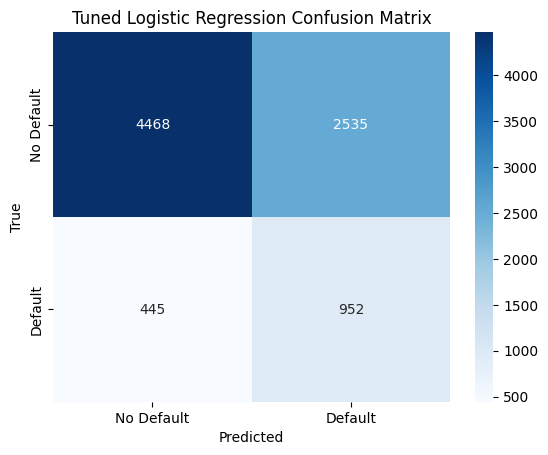

Tuned Decision Tree: Recall=42.38%, Accuracy=76.54%, Sensitivity=33.67%


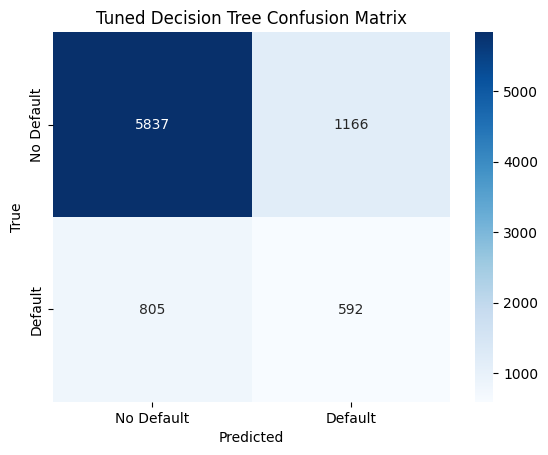

Tuned KNN: Recall=53.04%, Accuracy=74.62%, Sensitivity=33.42%


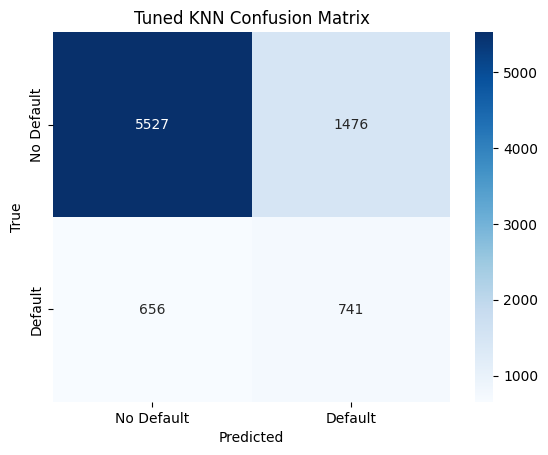

Tuned Random Forest: Recall=48.89%, Accuracy=82.44%, Sensitivity=47.30%


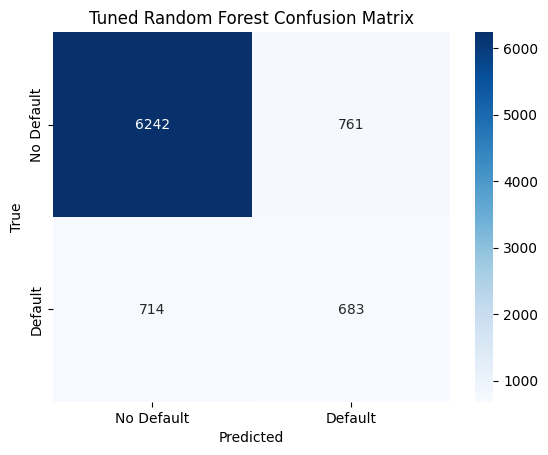

In [11]:
# Perform RandomizedSearchCV for each model
for i, model in enumerate(models):
    random_search = RandomizedSearchCV(model, param_distributions = param_grids[i], n_iter=10, cv=cv, n_jobs=-1, random_state=42)
    random_search.fit(X_train_resampled, y_train_resampled)
    
    best_model = random_search.best_estimator_
    best_models.append(best_model)
    
    # Perform feature selection
    kbest = SelectKBest(f_classif, k=14)
    X_train_selected = kbest.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = kbest.transform(X_test)
    
    # Retrain the best model on the selected features
    best_model.fit(X_train_selected, y_train_resampled)
    
    y_pred = best_model.predict(X_test_selected)
    recall = recall_score(y_test, y_pred)
    sensitivity = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    recall_list.append(recall)
    sensitivity_list.append(sensitivity)
    accuracy_list.append(accuracy)
    
    print(f"Tuned {model_names[i]}: Recall={recall*100:.2f}%, Accuracy={accuracy*100:.2f}%, Sensitivity={sensitivity*100:.2f}%")


    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
    plt.title(f'Tuned {model_names[i]} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

#### *Findings*
* Following extensive tuning, the optimal value for 'k' in the feature selection process is determined to be 14.

### 11. Find the Best Model
- Determine the model with the highest recall score to reduce expected loss.

In [12]:
# Find the model with the best recall
best_recall_index = np.argmax(recall_list)
print(f"Best model: {model_names[best_recall_index]} with recall={recall_list[best_recall_index]*100:.2f}% and accuracy={accuracy_list[best_recall_index]*100:.2f}%")

Best model: Logistic Regression with recall=68.15% and accuracy=64.52%


In [13]:
# Balanced Model
# Calculate F1 scores for each best model
for i in range(len(recall_list)):
    f1 = f1_score(y_test, best_models[i].predict(X_test_selected))
    f1_scores_list.append(f1)

# Find the model with the best F1 score
best_f1_index = np.argmax(f1_scores_list)
print(f"Balanced model: {model_names[best_f1_index]} with recall={recall_list[best_f1_index]*100:.2f}%, sensitivity={sensitivity_list[best_f1_index]*100:.2f}%, and F1 score={f1_scores_list[best_f1_index]*100:.2f}%")

Balanced model: Random Forest with recall=48.89%, sensitivity=47.30%, and F1 score=48.08%


#### *Note*

Even though linear regression is the best model for reducing expected loss by focusing on recall, it has a low sensitivity. Therefore, a more balanced model would be Random Forest as shown by it's F1 Scores.

### 12. Present Results
- Present the results as a bar chart, comparing recall, sensitivity and accuracy scores for each model.

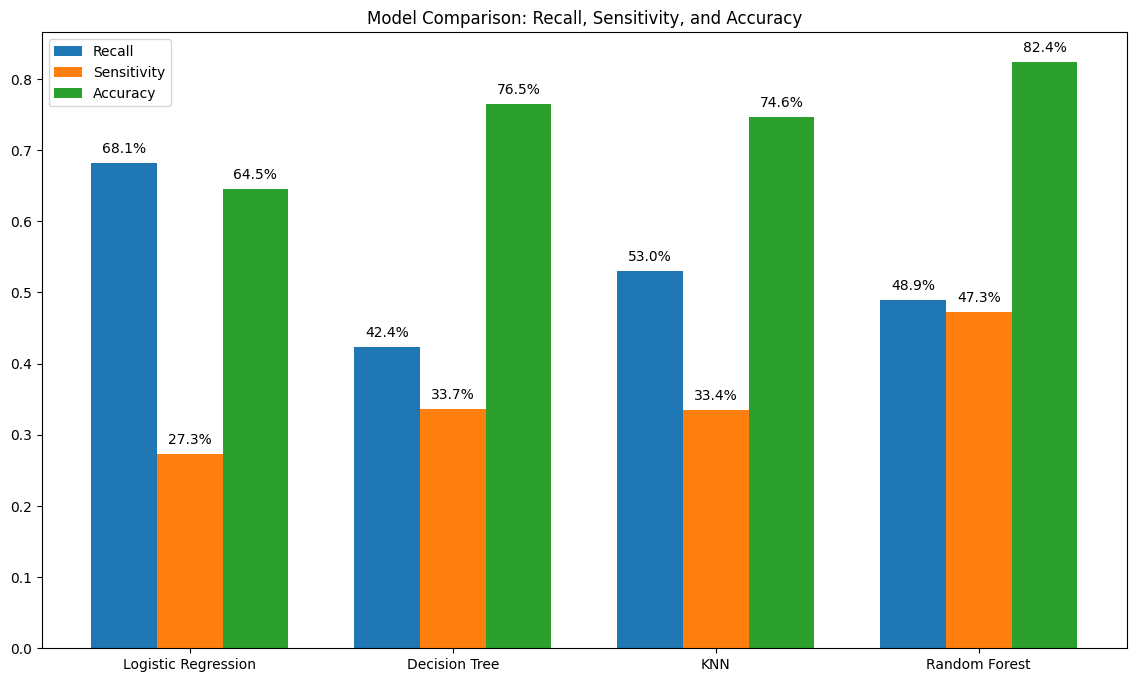

In [14]:
# Presenting the results as a bar chart
plt.figure(figsize=(14, 8))
x_axis = np.arange(len(model_names))
bar_width = 0.25

# Plot bars
plt.bar(x_axis - bar_width, recall_list, bar_width, label='Recall')
plt.bar(x_axis, sensitivity_list, bar_width, label='Sensitivity')
plt.bar(x_axis + bar_width, accuracy_list, bar_width, label='Accuracy')

# Add data labels
for i, (recall, sensitivity, accuracy) in enumerate(zip(recall_list, sensitivity_list, accuracy_list)):
    plt.text(i - bar_width, recall + 0.01, f"{recall * 100:.1f}%", ha='center', va='bottom')
    plt.text(i, sensitivity + 0.01, f"{sensitivity * 100:.1f}%", ha='center', va='bottom')
    plt.text(i + bar_width, accuracy + 0.01, f"{accuracy * 100:.1f}%", ha='center', va='bottom')

# Customize the plot
plt.xticks(x_axis, model_names)
plt.legend()
plt.title('Model Comparison: Recall, Sensitivity, and Accuracy')
plt.show()


### Expected Loss on Optimized Model
- Calculate the expected loss based on probability of default and LIMIT_BAL

In [15]:
# Transform X_test with the selected features
X_test_selected = kbest.transform(X_test)

# Calculate prediction probabilities
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]

# Extract the 'LIMIT_BAL' column from the original (unscaled) test set
X_test_unscaled = scaler.inverse_transform(X_test)
X_test_unscaled = pd.DataFrame(X_test_unscaled, columns=X.columns)
credit_amount = X_test_unscaled['LIMIT_BAL'].values

# Calculate expected loss for each customer
expected_loss = y_pred_proba * credit_amount

# Calculate the total expected loss
total_expected_loss = np.sum(expected_loss)
print(f"Total expected loss: ${total_expected_loss:,.0f}")

total_limit_bal = np.sum(credit_amount)
print(f"Total of LIMIT_BAL in the test set: ${total_limit_bal:,.0f}")

print(f"Expected Loss {(total_expected_loss/total_limit_bal)*100:,.1f}%")

Total expected loss: $361,412,067
Total of LIMIT_BAL in the test set: $1,426,027,680
Expected Loss 25.3%


## Next Steps
### Credit Risk Segmentation

A Credit risk segmentation would help take specific actions regarding the probability of default and customer behaivor in order to minimize losses.
<br><br>
By categorizing customers into low, medium, and high-risk groups, institutions can tailor their strategies and allocate resources more effectively. 
<br><br>
Overall, this segmentation allows to make more informed decisions, optimize their risk management efforts, and ultimately improve their bottom line.

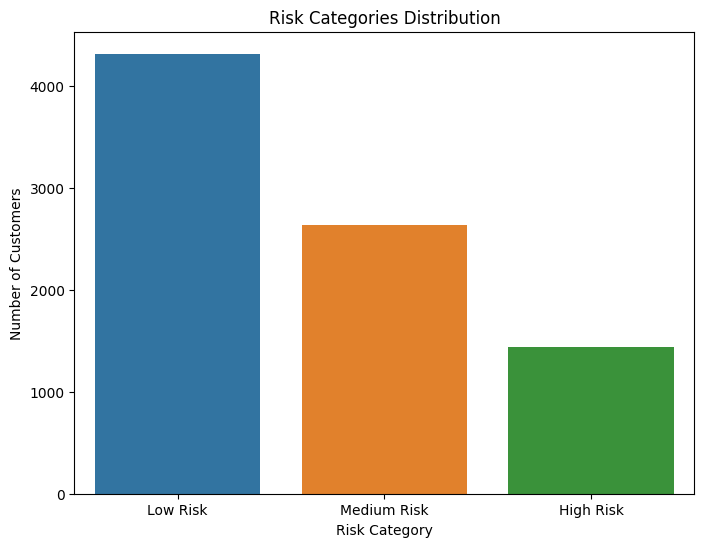

In [16]:
low_risk_threshold = 0.25
medium_risk_threshold = 0.5

# Predict probabilities for the test set
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]

# Assign risk categories to the test data
risk_categories = np.where(y_pred_proba < low_risk_threshold, 'Low Risk',
                           np.where(y_pred_proba < medium_risk_threshold, 'Medium Risk', 'High Risk'))

# Create a DataFrame with risk categories
risk_df = pd.DataFrame({'Risk_Category': risk_categories})

# Display the number of customers in each risk category
#print(risk_df['Risk_Category'].value_counts())

# Plot the risk categories distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=risk_df, x='Risk_Category', order=['Low Risk', 'Medium Risk', 'High Risk'])
plt.title('Risk Categories Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Number of Customers')
plt.show()

### Risk Segment and Possible Approach

- Low Risk:

    - Continue to offer credit and provide incentives for timely payments.
    - Explore opportunities to upsell and cross-sell products or services, as this group is less likely to default.
    - Regularly monitor their credit behavior to ensure it remains in the low-risk category. 
<br><br>
- Medium Risk:

    - Closely monitor their credit behavior and payment history.
    - Offer financial education and budgeting tools to help them manage their finances better.
    - Consider adjusting credit limits or interest rates to minimize potential losses.
    - Maintain regular communication with the customers to understand their financial situation and address any concerns.
<br><br>
- High Risk:

    - Restrict or reduce credit limits to minimize potential losses.
    - Implement stricter payment terms or require collateral for new loans or credit.
    - Engage in proactive communication to address any financial difficulties the customers might be facing.
    - Consider debt restructuring or offering settlement options if the customers are struggling with repayments.

### Analytics Roadmap
